### MEDIMOS LA CORRELACIÓN ENTRE LAS VARIABLES DEL DF FINAL

In [30]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [31]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [33]:
df_analisis.sample(20)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
949,no,travel_rarely,7.0,4,3.0,male,4,1,3,single,3,no,13,part_time,0,0,2,2,1988,no,7.0,28111.13,3.0
850,no,travel_rarely,4.0,4,3.0,male,2,1,2,married,6,none,21,part_time,0,3,3,1,1990,yes,10.0,26220.00,3.0
835,no,travel_rarely,8.0,3,3.0,male,3,1,1,divorced,4,none,18,part_time,1,3,2,2,1967,yes,10.0,28111.13,3.0
788,no,travel_rarely,8.0,2,1.0,male,3,2,3,unknown,0,yes,22,part_time,1,3,5,4,1998,yes,6.0,53914.11,2.0
1392,yes,travel_frequently,2.0,3,3.0,male,2,1,4,single,7,no,14,part_time,0,3,1,0,1992,yes,3.0,28111.13,4.0
221,no,travel_rarely,10.0,5,4.0,female,4,3,3,unknown,0,none,14,part_time,2,3,9,8,1990,yes,10.0,100071.84,3.0
620,no,unknown,4.0,2,4.0,male,2,5,2,married,2,none,14,none,1,2,11,8,1977,yes,10.0,187890.00,3.0
836,no,travel_rarely,9.0,2,3.0,male,3,1,4,single,1,none,12,part_time,0,3,2,1,1985,yes,10.0,28111.13,3.0
629,no,travel_rarely,8.0,4,3.0,male,3,1,1,married,9,no,13,part_time,0,2,5,4,1971,yes,12.0,28111.13,1.0
1342,no,non_travel,1.0,3,3.0,male,2,1,2,married,6,no,20,part_time,0,3,3,2,1991,yes,5.0,28111.13,3.0


In [34]:
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


### DOCUMENTACIÓN DESCRIBE NOE

### CORRELACIÓN VARIABLES NUMÉRICAS

In [35]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


🔍 Observaciones Claves NOE

    Variables fuertemente correlacionadas con job_level y annual_salary

        job_level tiene una alta correlación con annual_salary (0.88). Esto tiene sentido porque a mayor nivel laboral, mayor salario.

        total_years_worked también está muy correlacionado con job_level (0.62) y annual_salary (0.56).

    Edad y Experiencia vs. Permanencia en la Empresa

        birth_year está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.45).** Esto sugiere que los empleados más jóvenes han trabajado menos años en general y tienen salarios más bajos.

        years_at_company y years_with_current_manager están muy correlacionados entre sí (0.76), lo cual es lógico.

    Factores de Satisfacción y Rotación

        environmental_satisfaction_level, job_satisfaction_level y work_life_balance tienen correlaciones bajas con otras variables. Esto podría indicar que la satisfacción laboral es más subjetiva y menos dependiente de factores numéricos como el salario o los años trabajados.

    Otros hallazgos interesantes

        num_companies_worked tiene una relación positiva con total_years_worked (0.21), lo que sugiere que las personas con más experiencia han cambiado más de empresa.

        education_level tiene una correlación moderada con total_years_worked (0.12), pero una correlación negativa con birth_year (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

### CÓDIGO Y GRÁFICA DE ISA PARA EL ESPEJO

In [36]:
## COREGIR CON EL CÓDIGO DE ISA# Filtrar las correlaciones en los rangos deseados
df_filtrado = df_correlaciones[
    ((df_correlaciones >= 0.5) & (df_correlaciones <= 1)) | 
    ((df_correlaciones <= -0.5) & (df_correlaciones >= -1))
]

# Ver el DataFrame filtrado
display(df_filtrado)

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environmental_satisfaction_level,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_involvement_level,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_level,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.532415,NaN,-0.507748,0.620530,0.882054,NaN
job_satisfaction_level,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_companies_worked,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percent_salary_hike,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stock_option_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
training_sessions_last_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


#### VALORACIÓN DE LOS RESULTADOS OBTENIDOS

Según los datos que arrojan los métodos de correlación realizados tanto con el Método de Pearson como de Spearman no podemos obtener conclusiones relevantes en cuanto a la rotación de los empleados en la empresa. Con este primer análisis se ha realizado una correlación de las variables numéricas. 

### CORRELACIÓN VARIABLES CATEGÓRICAS

In [37]:
df_categ = df_analisis.select_dtypes(include = 'object')

In [38]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,female,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


## NOE. Análisis de las Variables Categóricas

    Rotación de empleados (employee_turnover)

        Hay 1614 empleados en total.

        1355 empleados no han renunciado ("no"), mientras que 259 sí lo han hecho.

        Esto sugiere un desbalance en los datos, lo que podría afectar modelos predictivos (sería importante considerar técnicas como oversampling o undersampling).

    Frecuencia de viajes (business_travel_frequency)

        La categoría más frecuente es "unknown" (772 casos).

        Es preocupante que haya muchos valores desconocidos, lo que podría afectar el análisis.

        Podría valer la pena investigar si los valores "unknown" pueden ser imputados o descartados.

    Género (gender)

        Predominan los hombres (971 casos) frente a las mujeres (643 casos).

        Podría analizarse si hay diferencias en rotación por género.

    Estado civil (marital_status)

        Hay muchos valores "unknown" (651 casos), lo que nuevamente sugiere problemas con la calidad de los datos.

        Si esta variable fuera relevante, podríamos considerar estrategias de imputación.

    Horas extra (overtime_hours)

        La mayoría de empleados no hacen horas extra (682 casos).

        Puede ser interesante ver si hay relación entre hacer horas extra y la rotación.

    Tipo de jornada (standard_work_hours)

        888 empleados trabajan a tiempo parcial.

        Esto puede ser un factor relevante para analizar la rotación.

    Trabajo remoto (remote_work)

        1000 empleados trabajan en remoto (lo cual es la mayoría).

        Podríamos analizar si el trabajo remoto reduce la rotación.

### Género (gender) vs. Rotación

    ¿Hay diferencias en la rotación entre hombres y mujeres?

Trabajo Remoto (remote_work) vs. Rotación

    ¿Los empleados remotos tienen menor rotación que los presenciales?

Horas Extra (overtime_hours) vs. Rotación

    ¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?

Frecuencia de Viajes (business_travel_frequency) vs. Rotación

    ¿Viajar más está relacionado con mayor rotación?

Estado Civil (marital_status) vs. Rotación

    ¿El estado civil influye en la permanencia en la empresa?

## ROTACIÓN DE EMPLEADOS SEGÚN SU GÉNERO

<Axes: xlabel='employee_turnover', ylabel='count'>

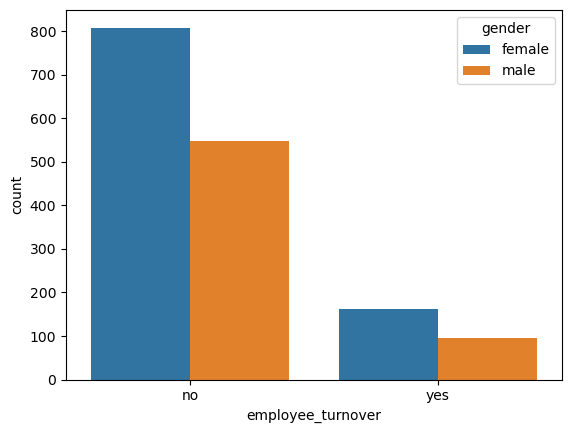

In [39]:
sns.countplot(x='employee_turnover',hue = 'gender',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN SU FRECUENCIA DE VIAJES

<Axes: xlabel='employee_turnover', ylabel='count'>

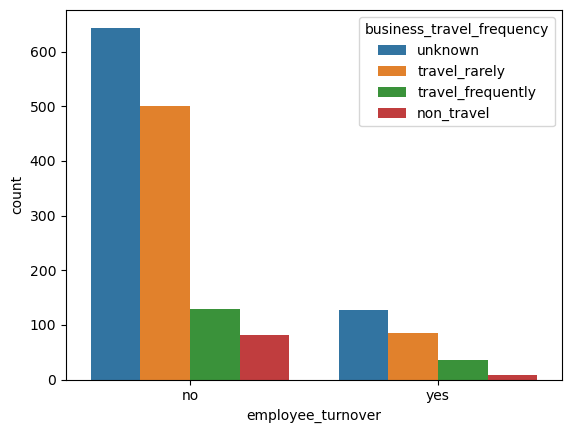

In [40]:
sns.countplot(x='employee_turnover',hue = 'business_travel_frequency',data=df_categ)

#### COMENTAR GRÁFICA

### ROTACIÓN DE EMPLEADOS SEGÚN SU ESTADO CIVIL

<Axes: xlabel='employee_turnover', ylabel='count'>

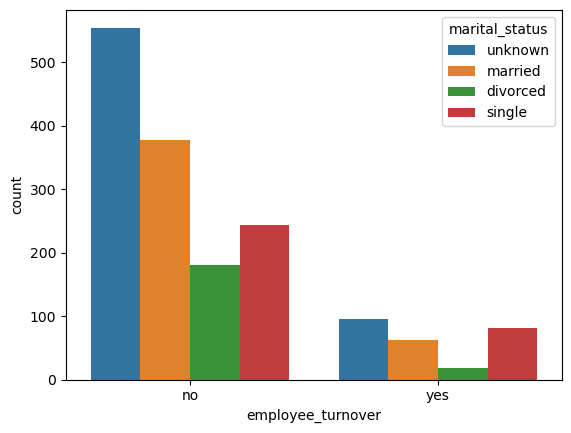

In [41]:
sns.countplot(x='employee_turnover',hue = 'marital_status',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN LAS HORAS EXTRAS

<Axes: xlabel='employee_turnover', ylabel='count'>

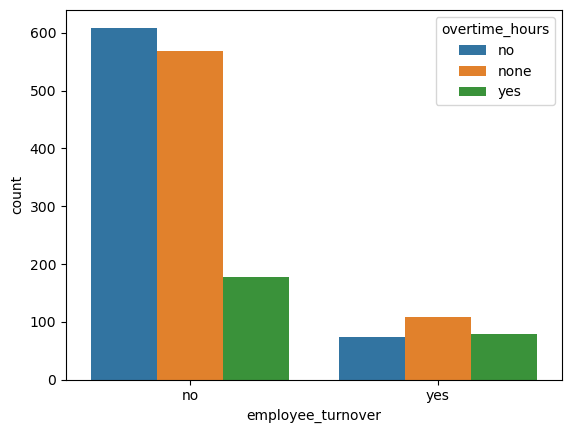

In [42]:
sns.countplot(x='employee_turnover',hue = 'overtime_hours',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE LA JORNADA LABORAL

<Axes: xlabel='employee_turnover', ylabel='count'>

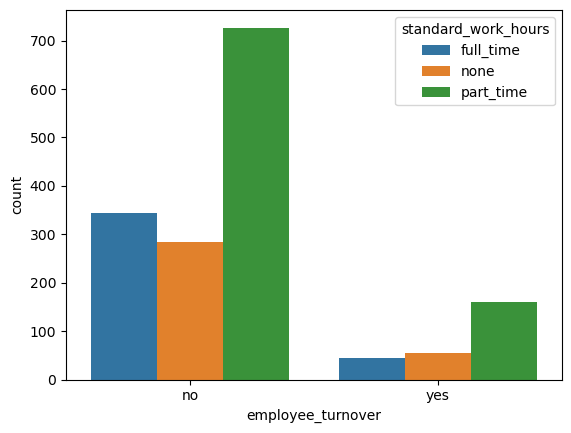

In [43]:
sns.countplot(x='employee_turnover',hue = 'standard_work_hours',data=df_categ)

### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE TELE_TRABAJO

<Axes: xlabel='employee_turnover', ylabel='count'>

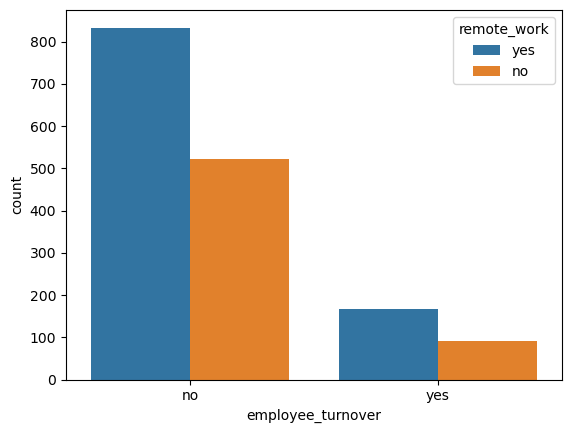

In [44]:
sns.countplot(x='employee_turnover',hue = 'remote_work',data=df_categ)

### COMENTAR GRÁFICA

🔍 Observaciones de los Gráficos

    Género vs. Rotación

        Parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

    Trabajo Remoto vs. Rotación

        La mayoría de los empleados trabajan en remoto, y la rotación no parece variar mucho entre los grupos.

    Horas Extra vs. Rotación

        Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

        Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.

    Frecuencia de Viajes vs. Rotación

        Hay muchos valores "unknown", lo cual dificulta el análisis.

        Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

    Estado Civil vs. Rotación

        Hay muchos valores "unknown".

        Parece que los empleados solteros tienen más rotación que los casados/divorciados.

### MEDICIONES COLUMNAS DE SATISFACCIÓN

In [45]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [46]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [47]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


## COMENTAR NOE

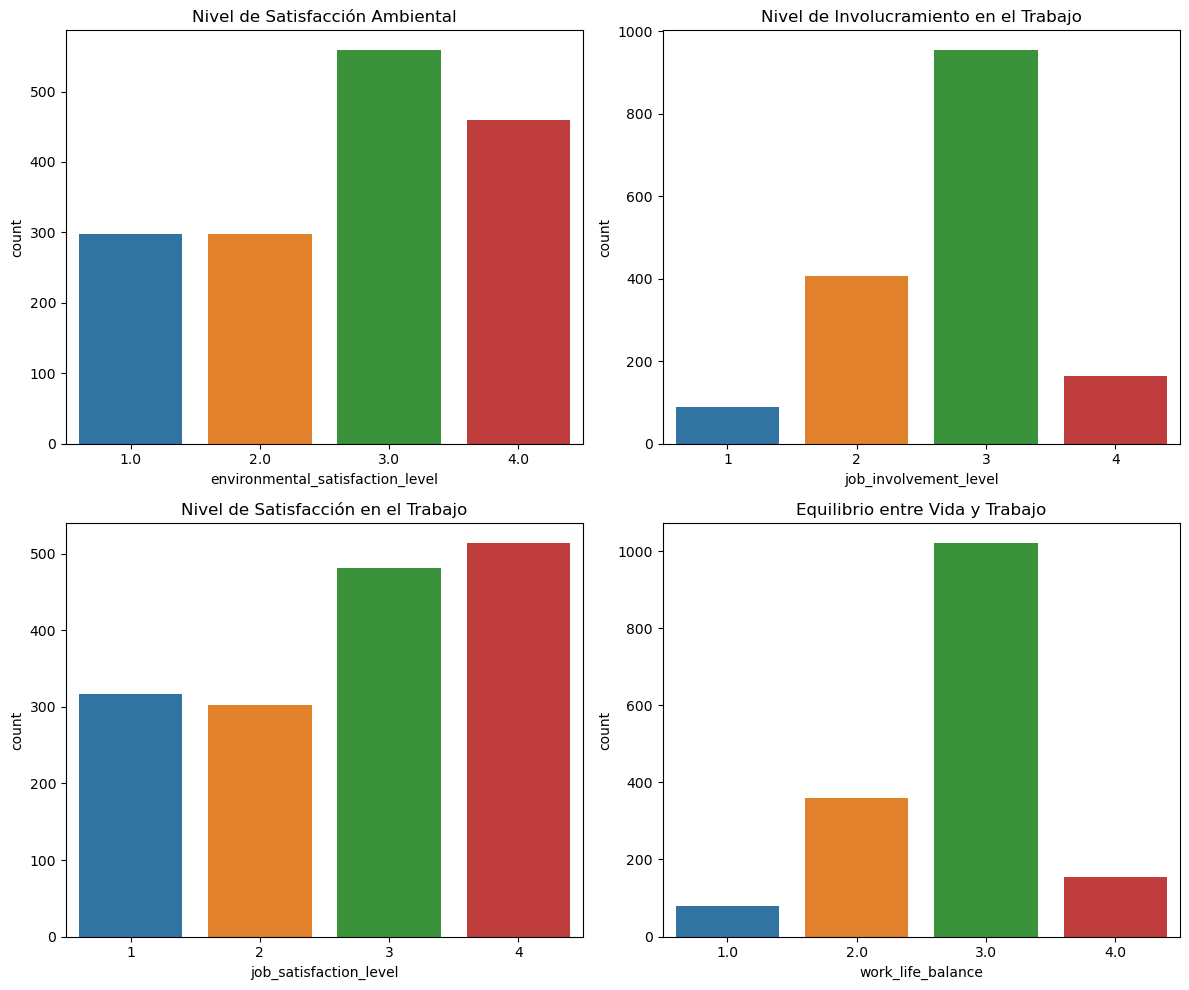

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### COMENTAR GRÁFICAS NOE

### ANÁLISIS DE LOS NIVELES DE SATISFACCIÓN CON RESPECTO AL ABANDONO DE LOS EMPLEADOS

In [49]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

### REALIZAR CROSSTAP DE LAS COLUMNAS DE SATISFACCIÓN PATRI